## KDE plot

In [83]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KernelDensity

from scipy.stats import norm
from statsmodels.nonparametric.kde import KDEUnivariate

In [92]:
a = np.random.randn(100)
b = np.random.randn(100)

In [93]:
a

array([-2.16586924e+00, -1.20809656e+00,  1.31466320e+00,  9.80616263e-02,
        8.95639541e-02,  3.12979608e-01,  1.68755398e+00, -1.93726585e+00,
       -2.97014417e-01,  4.64443490e-01,  5.23368446e-01,  1.55480249e+00,
        1.84509116e-01, -5.10576913e-03,  1.28178995e+00,  3.30803175e-01,
        7.80798318e-01,  4.31412161e-01, -9.03813625e-01,  9.24724310e-01,
        1.06850780e+00, -5.86885150e-01,  3.28594640e-02, -1.34348305e+00,
       -1.05836657e-01, -3.47176679e-01,  4.24017261e-04,  1.13477018e+00,
        1.08211709e-01, -1.67634780e+00, -1.33280225e+00,  1.14820308e+00,
        6.12193711e-01, -2.30628104e+00,  8.01992628e-02, -2.43526362e+00,
        4.90418017e-01, -6.22258637e-01,  1.73736466e+00, -2.06753704e+00,
        5.54534522e-01, -1.38020843e-01, -3.06860628e-01,  5.91097271e-01,
        5.12879855e-01,  8.10132191e-01, -7.16964621e-01,  5.08552788e-01,
        6.71788551e-01, -7.50438063e-01,  8.62741387e-01,  1.38717250e+00,
       -2.62500542e+00,  

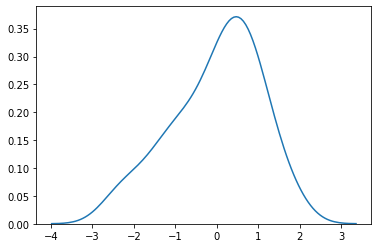

In [94]:
sns.kdeplot(a)

In [63]:
np.full_like(a, 0.01)

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

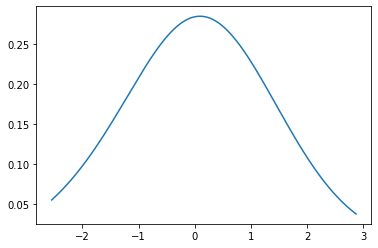

In [82]:
x = np.reshape(a, (-1, 1))
# print(x)
x_d = np.linspace(np.min(x), np.max(x), 1000)
x_d = np.reshape(x_d, (-1, 1))

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x)

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d)

# plt.fill_between(x_d.ravel(), np.exp(logprob), alpha=0.5)
plt.plot(x_d.ravel(), np.exp(logprob))
# plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
# plt.ylim(-0.02, 0.22)

/home/shahnoor/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


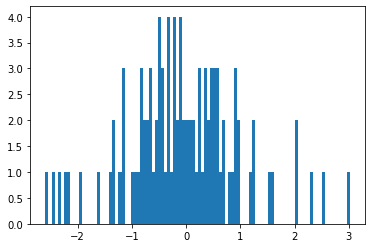

In [54]:
a = plt.hist(a, bins=100, normed=False)

In [47]:
kernel = scp.stats.gaussian_kde(a)

-9.60266523922305


(0, 0.45)

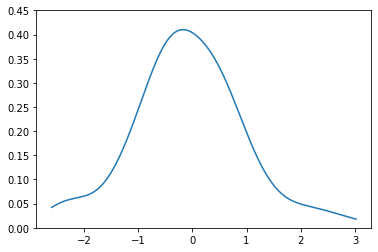

In [48]:
points = np.linspace(np.min(a), np.max(a), 1000)
y = kernel.evaluate(points)
plt.plot(points, y)
print(np.sum(y*points))
plt.ylim([0, 0.45])

In [20]:

def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [21]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [22]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

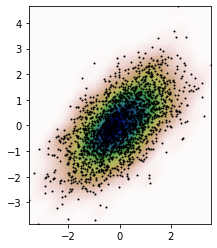

In [23]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [27]:
kernel.evaluate([1, 1])

array([0.09120892])

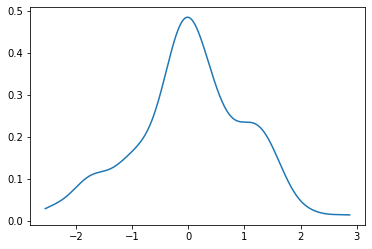

In [90]:
x = a
x_grid = np.linspace(np.min(x), np.max(x), 1000) 
kde = KDEUnivariate(x)
kde.fit(bw=0.3)
y = kde.evaluate(x_grid)
plt.plot(x_grid, y)

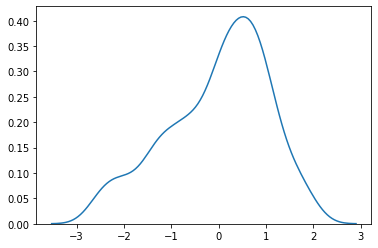

In [95]:
sns.kdeplot(a, bw=0.3)

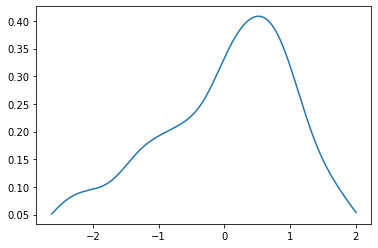

In [97]:
x = np.reshape(a, (-1, 1))
# print(x)
x_d = np.linspace(np.min(x), np.max(x), 1000)
x_d = np.reshape(x_d, (-1, 1))

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=0.3, kernel='gaussian')
kde.fit(x)

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d)

# plt.fill_between(x_d.ravel(), np.exp(logprob), alpha=0.5)
plt.plot(x_d.ravel(), np.exp(logprob))
# plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
# plt.ylim(-0.02, 0.22)

In [99]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

-1.853528441688212
-1734.1374209153337
0.0
-58916.66608266581


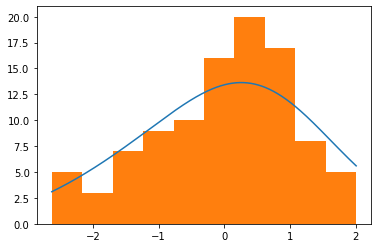

In [121]:

x = np.reshape(a, (-1, 1))
print(np.sum(x))
xd = np.linspace(np.min(a), np.max(a), 1000)
xd = np.reshape(xd, (-1, 1))

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(x)
print(kde.score(xd))
print(np.exp(kde.score(xd)))
y = kde.score_samples(xd)

plt.plot(xd, np.exp(y)*50)
plt.hist(x)
print(np.sum(xd*np.exp(y)))

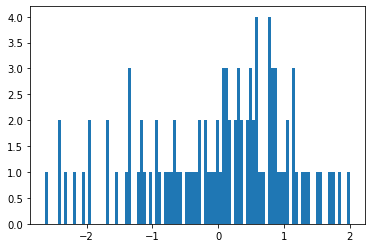

In [123]:
a = plt.hist(a, bins=100)

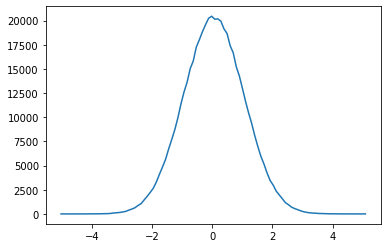

In [137]:
a = np.random.randn(500000)
y, x = np.histogram(a, bins=100)
plt.plot(x[1:], y)

In [127]:
help(np.histogram)

Help on function histogram in module numpy:

histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
    Compute the histogram of a set of data.
    
    Parameters
    ----------
    a : array_like
        Input data. The histogram is computed over the flattened array.
    bins : int or sequence of scalars or str, optional
        If `bins` is an int, it defines the number of equal-width
        bins in the given range (10, by default). If `bins` is a
        sequence, it defines a monotonically increasing array of bin edges,
        including the rightmost edge, allowing for non-uniform bin widths.
    
        .. versionadded:: 1.11.0
    
        If `bins` is a string, it defines the method used to calculate the
        optimal bin width, as defined by `histogram_bin_edges`.
    
    range : (float, float), optional
        The lower and upper range of the bins.  If not provided, range
        is simply ``(a.min(), a.max())``.  Values outside the range are
      

246.32213049100932
-3442.1046048059065
0.0
-1810.4946193247229


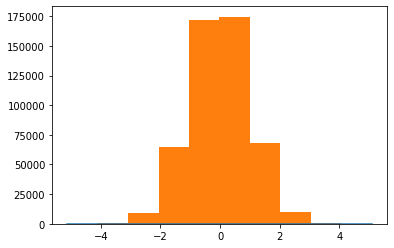

In [138]:
x = np.reshape(a, (-1, 1))
print(np.sum(x))
xd = np.linspace(np.min(a), np.max(a), 1000)
xd = np.reshape(xd, (-1, 1))

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(x)
print(kde.score(xd))
print(np.exp(kde.score(xd)))
y = kde.score_samples(xd)

plt.plot(xd, np.exp(y)*50)
plt.hist(x)
print(np.sum(xd*np.exp(y)))